随机森林
--------------
**集成学习**(ensemble learning)通过构建并结合多个学习器来完成学习任务。欲得到泛化性能强的集成，集成中的个体学习器应尽可能相互独立。给定一个训练数据集，对训练样本进行采样，产生若干个不相交的子集，再从每个子集中训练出一个基学习器。这样，由于训练数据不同，每个基学习器可获得比较大的差异；但是，如果采样出的每个子集都完全不同，则每个基学习器只用到了一小部分训练数据，每个基学习器都是有偏的。此时可使用互相有重叠的采样子数据集来训练基学习器。

**Bagging**是并行化集成学习方法的典型代表。给定包含有m个样本的数据集，随机取出一个样本放入采样集中，再把该样本放回初始数据集，使得下次采样时，该样本仍有可能被选中，这样经过m次随机采样操作，就得到了含有m个样本的采样集。如此，采样集中只包含初始训练集的一部分，有的多次出现，有的未出现。然后基于每个采样集，训练出一个基学习器，再将这些基学习器结合，就是Bagging的基本流程。

![](BaggingAlgo.png)

**随机森林**(Random Forest)是Bagging的一个扩张变体。RF在以决策树为基学习器构建Bagging集成的基础上，进一步在决策树的训练过程中引入随机属性选择。传统决策树在选择划分属性时是在当前结点的属性集合(假定有d个属性)中选择一个最优属性；而在RF中，对基决策树的每个结点，先从该结点的属性集合中随机选择一个包含k个属性的子集，然后再从这个子集中选择一个最优属性用来划分。k控制了随机性的引入程度，若$k=d$则基决策树的构建与传统决策树相同，$k=1$，则是随机选择一个属性用于划分，一般情况下，推荐$k=log_2d$。

随机森林简单、容易实现、计算开销小，在很多现实任务中展现出强大的性能，被誉为"*代表集成学习技术水平的方法*"。随机森林对Bagging只做了小改动，但是与Bagging中，基学习器的*多样性*仅通过样本扰动(通过对初始训练集采样)来实现，而在随机森林中，基学习器的多样性不仅有来自样本扰动，还有来自属性扰动。这就使得最终集成的泛化性能可通过个体学习器之间差异度的增加而进一步提升。

随机森林的收敛性与Bagging相似，起始性能往往相对较差，特别是在集成中只包含一个基学习器时。然而，随着基学习器数目的增加，随机森林通常会收敛到更低的泛化误差。由于随机森林使用的*随机型*决策树，在选择划分属性时，只需要考察一个属性子集，不像Bagging需要对所有属性进行考察，所以，它的训练效率常常优于Bagging。

![](rfconverge.png)

sklearn随机森林分类器
---------------------------------
```python
RandomForestClassifier(n_estimators=10, # 基学习器数量
                       criterion='gini', # 属性选择的标准(分裂树的标准)
                       max_depth=None, # 树的最大深度
                       min_samples_split=2, # 最小分裂样本数
                       min_samples_leaf=1, # 最小叶子节点样本数
                       # 最小叶子节点权重
                       min_weight_fraction_leaf=0.0, 
                       # 查找最佳分裂所需考虑的特征数，
                       # auto:sqrt(n_features),None:n_features
                       max_features='auto',
                       max_leaf_nodes=None, # 最大叶子节点数
                       min_impurity_split=1e-07, # 分裂的最小不纯度
                       bootstrap=True, 
                       oob_score=False, # 是否使用袋外样本估计准确度
                       n_jobs=1, # 并行job数，-1 代表全部
                       andom_state=None, 
                       verbose=0, 
                       warm_start=False, 
                       class_weight=None)
```
在随机森林算法中可以发现Bootstrap每次约有$\frac{1}{3}$的样本不会出现在Bootstrap所采集的样本集合中，当然也就没有参加决策树的建立,这$\frac{1}{3}$的数据称为袋外数据oob(out-of-bag)。它可以用于取代测试集误差估计方法。

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [30]:
iris = load_iris() # 鸢尾花卉数据集
print(iris.keys())
print("feature_names:", iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.shape)

(150, 4)


In [34]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [39]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df['species'][::10])

0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]


In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species
0,5.1,3.5,1.4,0.2,True,setosa
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,True,setosa
3,4.6,3.1,1.5,0.2,False,setosa
4,5.0,3.6,1.4,0.2,True,setosa


In [55]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [56]:
features = df.columns[:4]
print(train[features][:10])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2


In [43]:
clf = RandomForestClassifier(n_jobs=2)

In [57]:
y, _ = pd.factorize(train['species']) # 返回正确分类的索引

In [58]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
preds = iris.target_names[clf.predict(test[features])]

In [61]:
a = np.array(["foo", "foo", "foo", "foo", 
              "bar", "bar", "bar", "bar", 
              "foo", "foo", "foo", "bar"], dtype=object)
b = np.array(["one", "one", "one", "two", 
                  "one", "one", "one", "two", 
                  "two", "two", "one", "one"], dtype=object)
pd.crosstab(a, b, rownames=['a'], colnames=['b']) # 求共现矩阵

b,one,two
a,,
bar,4,1
foo,4,3


In [60]:
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,12,0,0
versicolor,0,10,0
virginica,0,1,9


In [64]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Decision Tree",
         "Random Forest", 
         "AdaBoost", 
         "Naive Bayes", 
         "LDA", 
         "QDA"]

classifiers = [KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier(),
               GaussianNB(),
               LDA(),
               QDA()]

In [65]:
X, y = make_classification(n_samples=100, # 生成样本数量，默认100
                           n_features=2, # 特征数量
                           n_redundant=0, # 冗余特征数量
                           n_informative=2, # 多信息特征数
                           random_state=1, # 随机数种子
                           n_classes=2, # 类别数量
                           n_clusters_per_class=1)

In [66]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
     
datasets = [make_moons(noise=0.3, random_state=0), # 生成半环形数据
            make_circles(noise=0.2, factor=0.5, random_state=1), # 生成环形数据
            linearly_separable]

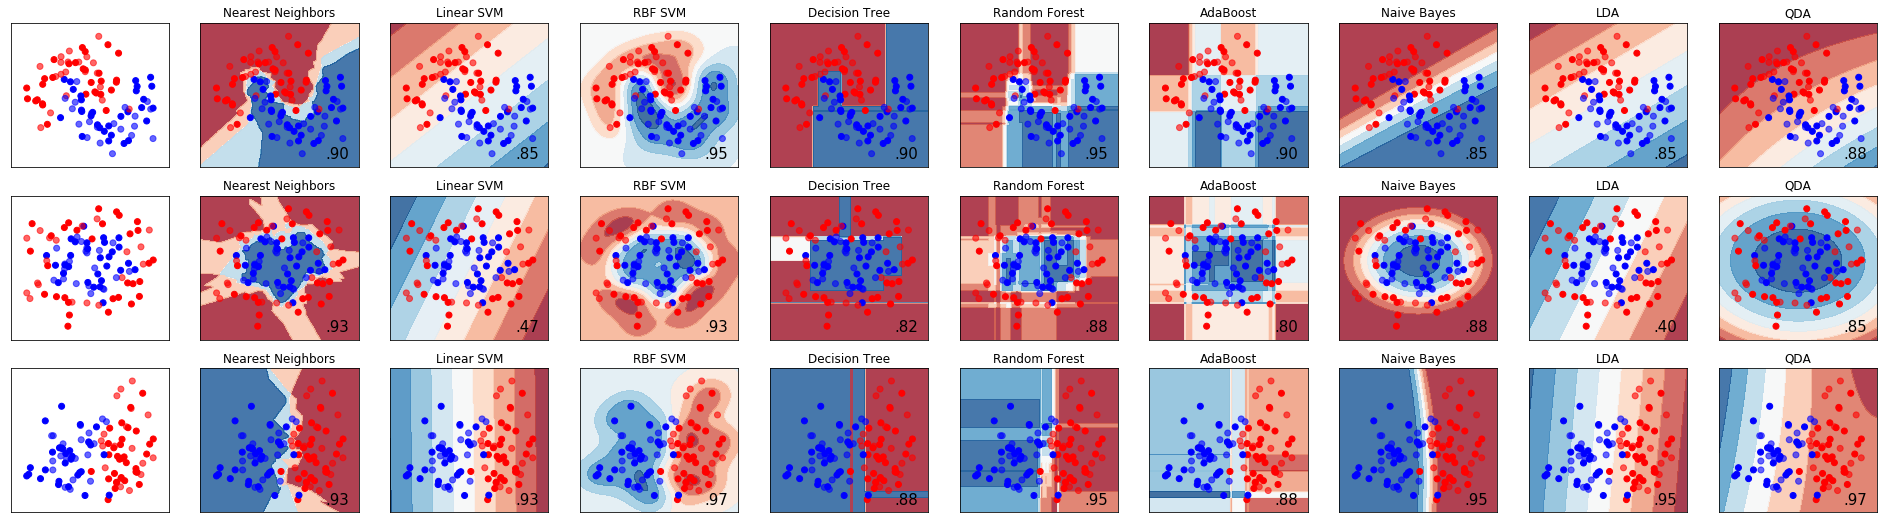

In [68]:
h = .02  # step size in the mesh
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
     
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
     
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
     
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test) # 得到测试集分数(准确率)
     
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
     
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
     
        # Plot also the training points
        ax.scatter(X_train[:, 0], 
                   X_train[:, 1], 
                   c=y_train, 
                   cmap=cm_bright)
        
        # and testing points
        ax.scatter(X_test[:, 0], 
                   X_test[:, 1], 
                   c=y_test, 
                   cmap=cm_bright,
                   alpha=0.6)
     
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, 
                ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
figure.subplots_adjust(left=.02, right=.98)
plt.show()